In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Generate time/#threads plots

In [3]:
data = pd.read_csv("./outputs/timings/time-th-404863.csv")
data.head()

,nthreads,time
0,1,0.303328
1,2,0.307687
2,3,0.312505
3,4,0.319726
4,5,0.324218


Text(0, 0.5, 'Time')

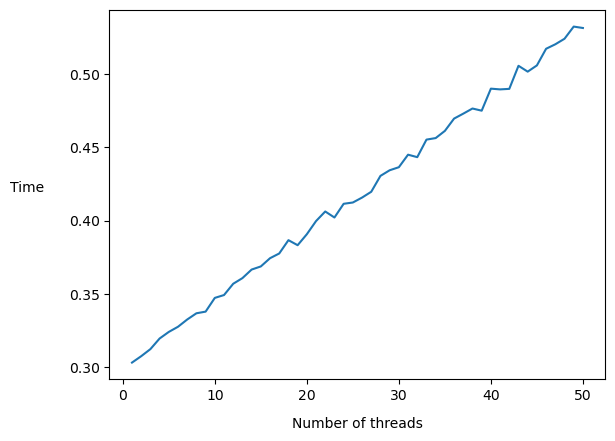

In [13]:
plt.plot(data["nthreads"], data["time"])
plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Time", labelpad=30, rotation=0, fontsize=10)